# 📘 Threshold Pairs Trading Strategy

## 🎯 Goal of This Notebook

This notebook implements a **threshold-based pairs trading strategy** over multiple stock pairs. The aim is to evaluate whether a rules-based approach using historical relationships between pairs of stocks can lead to profitable trades during a test period.

## 📈 What is Threshold Pairs Trading?

**Pairs Trading** is a market-neutral strategy that profits from the relative movement of two historically correlated stocks. The **threshold strategy** enhances this by introducing entry and exit signals based on the **spread's deviation from its mean**.

### 🔁 Strategy Summary:
1. **Find a stable pair** of stocks.
2. **Calculate the spread** between them.
3. **Compute the mean and standard deviation** of the spread in a training period.
4. **Set thresholds** (e.g., ±2 standard deviations).
5. **Generate trading signals**:
   - If spread > upper threshold → Short the spread.
   - If spread < lower threshold → Long the spread.
6. **Exit** the position when the spread reverts to the mean.

## 🧪 Workflow in This Notebook:
- Load and preprocess historical stock prices.
- Load pre-identified stock pairs.
- Apply threshold-based trading logic to each pair.
- Evaluate trading performance on a test set.
- Visualize spread and signal behavior.

---

## **0. Initial Setup: Imports & Config**

This section imports essential libraries:

- `numpy`, `pandas`: Data handling
- `matplotlib`: Visualization
- `pickle`: File handling
- `sys`: System operations
- `timedelta`:Date-time operations

In [1]:
import numpy as np
import pandas as pd
import pickle
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import timedelta

## Trading Strategy Implementation with `Trading`

The `Trading` class implements and evaluates pairs trading strategies with comprehensive performance analysis. Key components include:

### Core Functionality
- **Strategy Application**: Implements fixed-beta pairs trading with configurable entry/exit thresholds
- **Performance Tracking**: Calculates returns, Sharpe ratios, and account balances with/without costs
- **Risk Management**: Incorporates transaction costs, short fees, and position stabilization

### Main Methods

#### Strategy Execution
- `apply_strategy()`: Main entry point that applies trading strategy to all identified pairs
- `threshold_strategy()`: Implements fixed-beta threshold strategy with spread normalization
- `calculate_returns()`: Computes position returns without transaction costs
- `calculate_balance()`: Tracks portfolio balance with full cost accounting

#### Performance Analysis
- `analyze_results()`: Comprehensive performance evaluation across all pairs
- `_calculate_sharpe()`: Computes annualized Sharpe ratio with risk-free rate adjustment
- `_calculate_max_drawdown()`: Calculates maximum drawdown statistics with visualization
- `_calculate_portfolio_sharpe()`: Computes portfolio-level Sharpe ratio

#### Supporting Utilities
- `trade_summary()`: Compiles complete trading performance summary
- `_add_transaction_costs()`: Models commission, market impact, and short fees
- `_add_trading_duration()`: Tracks holding periods for cost calculations

### Key Features
1. **Cost Modeling**:
   - Explicit modeling of commissions (0.28%)
   - Short fee accounting (1% annual)
   - Market impact costs

2. **Position Management**:
   - Stabilization period to avoid whipsaws
   - Automatic position sizing based on beta
   - Detailed trade duration tracking

3. **Performance Metrics**:
   - Annualized and cumulative returns
   - Win/loss trade statistics
   - Portfolio-level risk metrics
   - Interactive drawdown visualization

4. **Configuration Options**:
   - Adjustable entry/exit thresholds
   - Test/train mode selection
   - Custom split dates for walk-forward testing

In [2]:
sys.path.append('/Users/zahraaghaei/Desktop/PairsTrading_master/notebooks/classes')
%load_ext autoreload
%aimport DataProcessor, Trader
%autoreload 1

# Create an instance of the DataProcessor and Trader
processor = DataProcessor.DataProcessor()
trading = Trader.Trading()

## **1. Data Loading and Preparation**

This section handles the loading and partitioning of price data for pairs trading strategy development and testing.

In [3]:
df_prices = pd.read_pickle('/Users/zahraaghaei/Desktop/PairsTrading_master/Data/new_pickle/df_prices')

training_dates = ('01-01-2007', '31-12-2012')
testing_dates = ('01-01-2013', '31-12-2016')
train_val_split = '01-01-2010'
df_train, df_test = processor.split_data(df_prices, training_dates, testing_dates)

Total of 358 tickers
Total of 358 tickers after removing tickers with Nan values


### Precomputed Pair Data Loading

This section loads preprocessed pairs and ticker classification data from pickle files for use in the pairs trading strategy.

In [4]:
with open("/Users/zahraaghaei/Desktop/PairsTrading_master/data/new_pickle/pairs_category", 'rb') as handle:
    pairs_category = pickle.load(handle)
    
with open("/Users/zahraaghaei/Desktop/PairsTrading_master/data/new_pickle/pairs_OPTICS_unsupervised", 'rb') as handle:
    pairs_OPTICS = pickle.load(handle)

with open("/Users/zahraaghaei/Desktop/PairsTrading_master/data/new_pickle/ticker_category_dict", 'rb') as handle:
    ticker_category_dict = pickle.load(handle)
    
with open("/Users/zahraaghaei/Desktop/PairsTrading_master/data/new_pickle/ticker_segment_dict", 'rb') as handle:
    ticker_segment_dict = pickle.load(handle)

In [5]:
n_years_val = round(len(df_train[train_val_split:])/(240))
n_years_val

3

## **2. Strategy Execution and Performance Analysis on Trading Data**

This section implements the pairs trading strategy and evaluates its performance metrics on `pairs_category` train data.

Entry delay turned on.
Pair: 297/297

PAIRS TRADING STRATEGY PERFORMANCE RESULTS
Number of trading pairs: 297
Portfolio Sharpe Ratio: 19.26
Average Total ROI: 40.51%
Average Annual ROI: 12.00%
Percentage of Positive Trades: 64.80%
Percentage of Profitable Pairs: 96.30%

Risk Metrics:
Maximum Drawdown: 1.07%
Maximum Drawdown Duration: 0 days
Total Drawdown Duration: 254 days


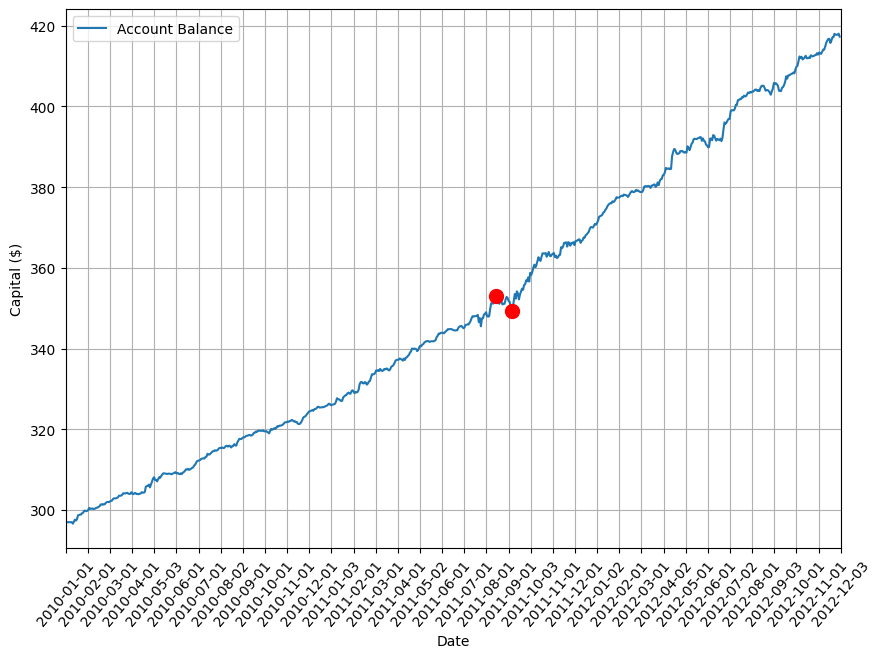

In [6]:
# Apply strategy
metrics_category, metrics_category_with_costs, performance_category_train = trading.apply_strategy(pairs_category, 
                                                                                 strategy = 'fixed_beta', 
                                                                                 split_date = train_val_split)
sharpe_ratio_category_train_nocosts, cum_returns_category_train_nocosts = metrics_category
sharpe_ratio_category_train_w_costs, cum_returns_category_train_w_costs = metrics_category_with_costs

# Analyze results
results_category, pairs_summary_category = trading.analyze_results(sharpe_ratio_category_train_w_costs,
                                                  cum_returns_category_train_w_costs,
                                                  performance_category_train,
                                                  pairs_category, ticker_segment_dict,
                                                  n_years_val)

# Print the results with formatting
print("\n")
print("="*50)
print("PAIRS TRADING STRATEGY PERFORMANCE RESULTS")
print("="*50)
print(f"Number of trading pairs: {results_category['n_pairs']}")
print(f"Portfolio Sharpe Ratio: {results_category['portfolio_sharpe']:.2f}")
print(f"Average Total ROI: {results_category['avg_total_roi']:.2f}%")
print(f"Average Annual ROI: {results_category['avg_annual_roi']:.2f}%")
print(f"Percentage of Positive Trades: {results_category['positive_trades_pct']:.2f}%")
print(f"Percentage of Profitable Pairs: {results_category['positive_pairs_pct']:.2f}%")
print("\nRisk Metrics:")
print(f"Maximum Drawdown: {abs(results_category['max_drawdown']):.2f}%")
print(f"Maximum Drawdown Duration: {results_category['max_dd_duration']} days")
print(f"Total Drawdown Duration: {results_category['total_dd_duration']} days")
print("="*50)

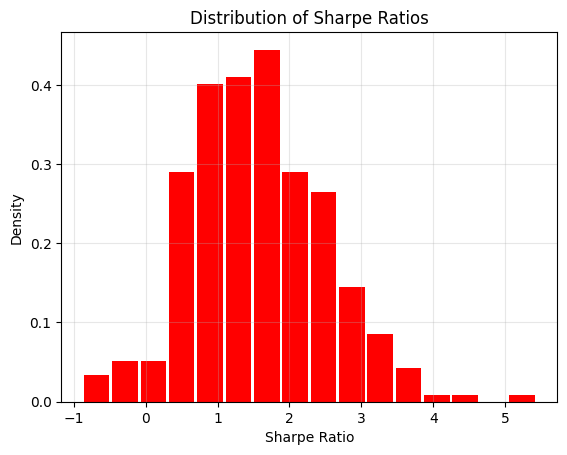

In [7]:
n, bins, patches = plt.hist(sharpe_ratio_category_train_w_costs, bins=16, density=True, 
                           orientation='vertical', color='red', rwidth=0.9, align='mid')

plt.title('Distribution of Sharpe Ratios')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
#pairs_summary_category

## **2. Strategy Execution and Performance Analysis on Trading Data**

This section implements the pairs trading strategy and evaluates its performance metrics on `pairs_OPTICS` train data.

Entry delay turned on.
Pair: 22/22

PAIRS TRADING STRATEGY PERFORMANCE RESULTS
Number of trading pairs: 22
Portfolio Sharpe Ratio: 7.10
Average Total ROI: 27.98%
Average Annual ROI: 8.57%
Percentage of Positive Trades: 62.71%
Percentage of Profitable Pairs: 90.91%

Risk Metrics:
Maximum Drawdown: 3.41%
Maximum Drawdown Duration: 0 days
Total Drawdown Duration: 323 days


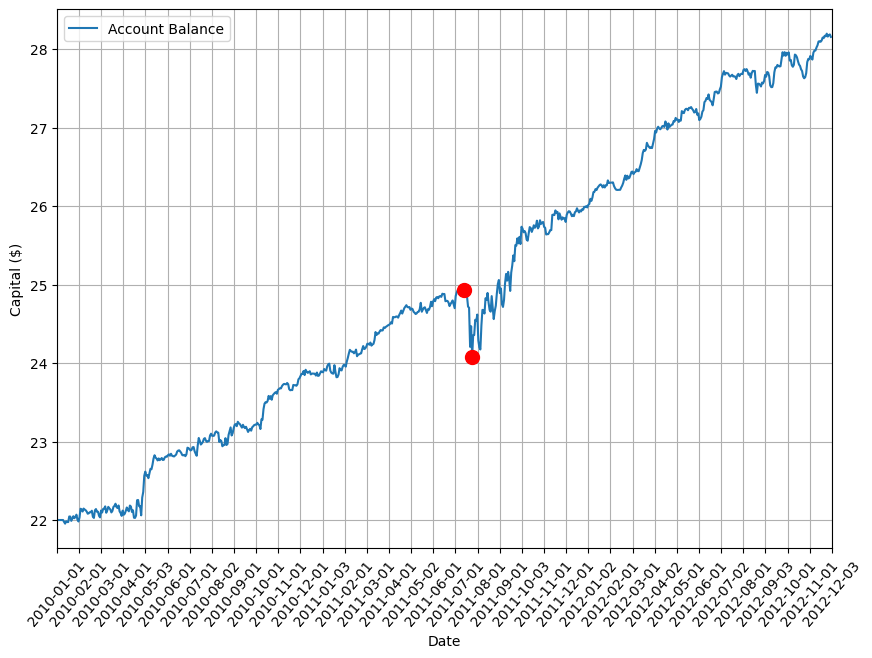

In [9]:
# Apply strategy
metrics_OPTICS, metrics_OPTICS_with_costs, performance_OPTICS_train = trading.apply_strategy(pairs_OPTICS, 
                                                                                 strategy = 'fixed_beta', 
                                                                                 split_date = train_val_split)
sharpe_ratio_OPTICS_train_nocosts, cum_returns_OPTICS_train_nocosts = metrics_OPTICS
sharpe_ratio_OPTICS_train_w_costs, cum_returns_OPTICS_train_w_costs = metrics_OPTICS_with_costs

# Analyze results
results_OPTICS, pairs_summary_OPTICS = trading.analyze_results(sharpe_ratio_OPTICS_train_w_costs,
                                                  cum_returns_OPTICS_train_w_costs,
                                                  performance_OPTICS_train,
                                                  pairs_OPTICS, ticker_segment_dict,
                                                  n_years_val)


# Print the results with formatting
print("\n")
print("="*50)
print("PAIRS TRADING STRATEGY PERFORMANCE RESULTS")
print("="*50)
print(f"Number of trading pairs: {results_OPTICS['n_pairs']}")
print(f"Portfolio Sharpe Ratio: {results_OPTICS['portfolio_sharpe']:.2f}")
print(f"Average Total ROI: {results_OPTICS['avg_total_roi']:.2f}%")
print(f"Average Annual ROI: {results_OPTICS['avg_annual_roi']:.2f}%")
print(f"Percentage of Positive Trades: {results_OPTICS['positive_trades_pct']:.2f}%")
print(f"Percentage of Profitable Pairs: {results_OPTICS['positive_pairs_pct']:.2f}%")
print("\nRisk Metrics:")
print(f"Maximum Drawdown: {abs(results_OPTICS['max_drawdown']):.2f}%")
print(f"Maximum Drawdown Duration: {results_OPTICS['max_dd_duration']} days")
print(f"Total Drawdown Duration: {results_OPTICS['total_dd_duration']} days")
print("="*50)

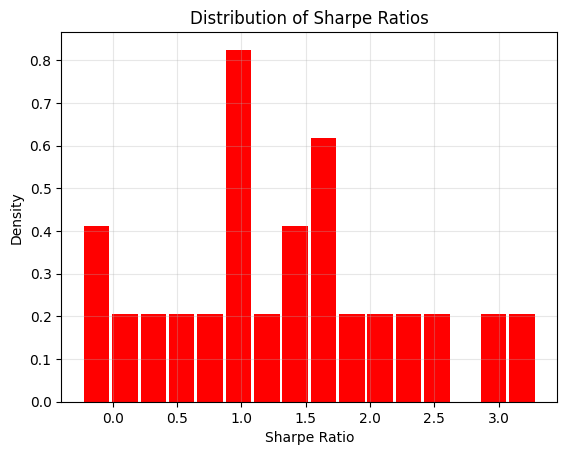

In [10]:
n, bins, patches = plt.hist(sharpe_ratio_OPTICS_train_w_costs, bins=16, density=True, 
                           orientation='vertical', color='red', rwidth=0.9, align='mid')

plt.title('Distribution of Sharpe Ratios')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
#pairs_summary_OPTICS


## **3. Out-of-Sample Strategy: Execution and Performance Analysis on Testing Data**

This section evaluates the pairs trading strategy's performance on unseen `pairs_category` test data to validate its robustness.

In [12]:
n_years_test = round(len(df_test)/(240))
n_years_test

4

Entry delay turned on.
Pair: 297/297

PAIRS TRADING STRATEGY PERFORMANCE RESULTS
Number of trading pairs: 297
Portfolio Sharpe Ratio: 16.65
Average Total ROI: 35.71%
Average Annual ROI: 10.71%
Percentage of Positive Trades: 62.19%
Percentage of Profitable Pairs: 84.51%

Risk Metrics:
Maximum Drawdown: 1.88%
Maximum Drawdown Duration: 0 days
Total Drawdown Duration: 417 days


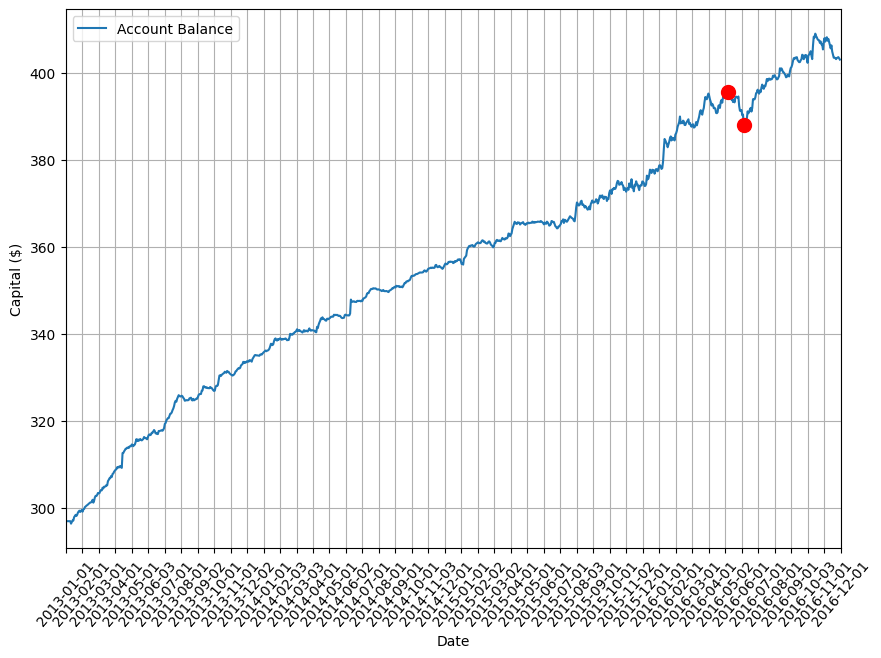

In [13]:
# Apply strategy
metrics_category, metrics_category_with_costs, performance_category_test = trading.apply_strategy(pairs_category, 
                                                                                 strategy = 'fixed_beta',
                                                                                 test_mode=True,
                                                                                 split_date = train_val_split)
sharpe_ratio_category_test_nocosts, cum_returns_category_test_nocosts = metrics_category
sharpe_ratio_category_test_w_costs, cum_returns_category_test_w_costs = metrics_category_with_costs

# Analyze results
results_category, pairs_summary_category = trading.analyze_results(sharpe_ratio_category_test_w_costs,
                                                  cum_returns_category_test_w_costs,
                                                  performance_category_test,
                                                  pairs_category, ticker_segment_dict,
                                                  n_years_val)


# Print the results with formatting
print("\n")
print("="*50)
print("PAIRS TRADING STRATEGY PERFORMANCE RESULTS")
print("="*50)
print(f"Number of trading pairs: {results_category['n_pairs']}")
print(f"Portfolio Sharpe Ratio: {results_category['portfolio_sharpe']:.2f}")
print(f"Average Total ROI: {results_category['avg_total_roi']:.2f}%")
print(f"Average Annual ROI: {results_category['avg_annual_roi']:.2f}%")
print(f"Percentage of Positive Trades: {results_category['positive_trades_pct']:.2f}%")
print(f"Percentage of Profitable Pairs: {results_category['positive_pairs_pct']:.2f}%")
print("\nRisk Metrics:")
print(f"Maximum Drawdown: {abs(results_category['max_drawdown']):.2f}%")
print(f"Maximum Drawdown Duration: {results_category['max_dd_duration']} days")
print(f"Total Drawdown Duration: {results_category['total_dd_duration']} days")
print("="*50)

## **3. Out-of-Sample Strategy: Execution and Performance Analysis on Testing Data**

This section evaluates the pairs trading strategy's performance on unseen `pairs_OPTICS` test data to validate its robustness.

Entry delay turned on.
Pair: 22/22

PAIRS TRADING STRATEGY PERFORMANCE RESULTS
Number of trading pairs: 22
Portfolio Sharpe Ratio: 8.44
Average Total ROI: 23.20%
Average Annual ROI: 7.20%
Percentage of Positive Trades: 56.60%
Percentage of Profitable Pairs: 68.18%

Risk Metrics:
Maximum Drawdown: 3.47%
Maximum Drawdown Duration: 2 days
Total Drawdown Duration: 465 days


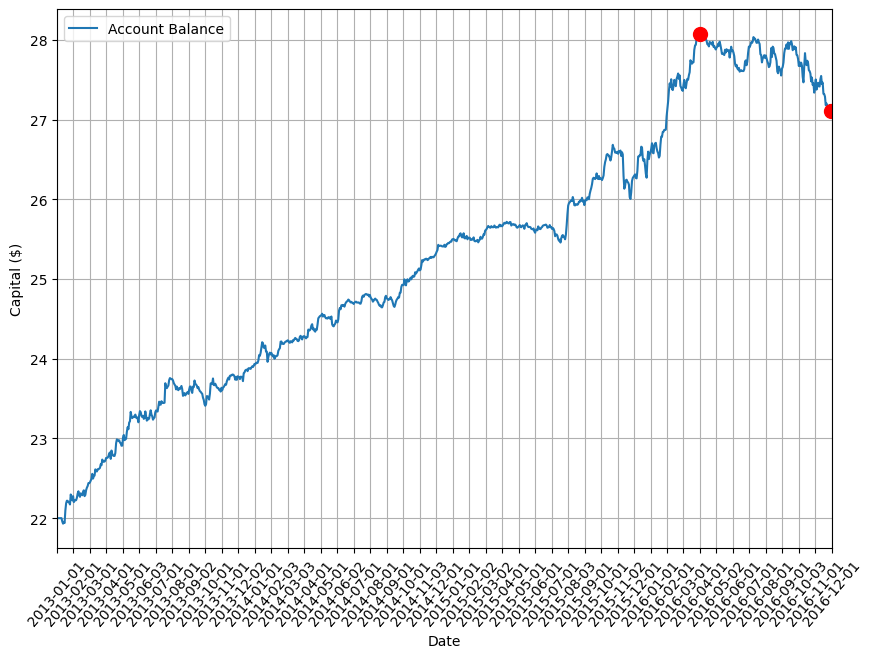

In [14]:
# Apply strategy
metrics_OPTICS, metrics_OPTICS_with_costs, performance_OPTICS_test = trading.apply_strategy(pairs_OPTICS, 
                                                                                 strategy = 'fixed_beta',
                                                                                 test_mode=True,
                                                                                 split_date = train_val_split)
sharpe_ratio_OPTICS_test_nocosts, cum_returns_OPTICS_test_nocosts = metrics_OPTICS
sharpe_ratio_OPTICS_test_w_costs, cum_returns_OPTICS_test_w_costs = metrics_OPTICS_with_costs

# Analyze results
results_OPTICS, pairs_summary_OPTICS = trading.analyze_results(sharpe_ratio_OPTICS_test_w_costs,
                                                  cum_returns_OPTICS_test_w_costs,
                                                  performance_OPTICS_test,
                                                  pairs_OPTICS, ticker_segment_dict,
                                                  n_years_val)

# Print the results with formatting
print("\n")
print("="*50)
print("PAIRS TRADING STRATEGY PERFORMANCE RESULTS")
print("="*50)
print(f"Number of trading pairs: {results_OPTICS['n_pairs']}")
print(f"Portfolio Sharpe Ratio: {results_OPTICS['portfolio_sharpe']:.2f}")
print(f"Average Total ROI: {results_OPTICS['avg_total_roi']:.2f}%")
print(f"Average Annual ROI: {results_OPTICS['avg_annual_roi']:.2f}%")
print(f"Percentage of Positive Trades: {results_OPTICS['positive_trades_pct']:.2f}%")
print(f"Percentage of Profitable Pairs: {results_OPTICS['positive_pairs_pct']:.2f}%")
print("\nRisk Metrics:")
print(f"Maximum Drawdown: {abs(results_OPTICS['max_drawdown']):.2f}%")
print(f"Maximum Drawdown Duration: {results_OPTICS['max_dd_duration']} days")
print(f"Total Drawdown Duration: {results_OPTICS['total_dd_duration']} days")
print("="*50)

In [ ]:
## Pairs Trading Visualization

This section generates detailed visualizations for each trading pair's performance during the out-of-sample test period.

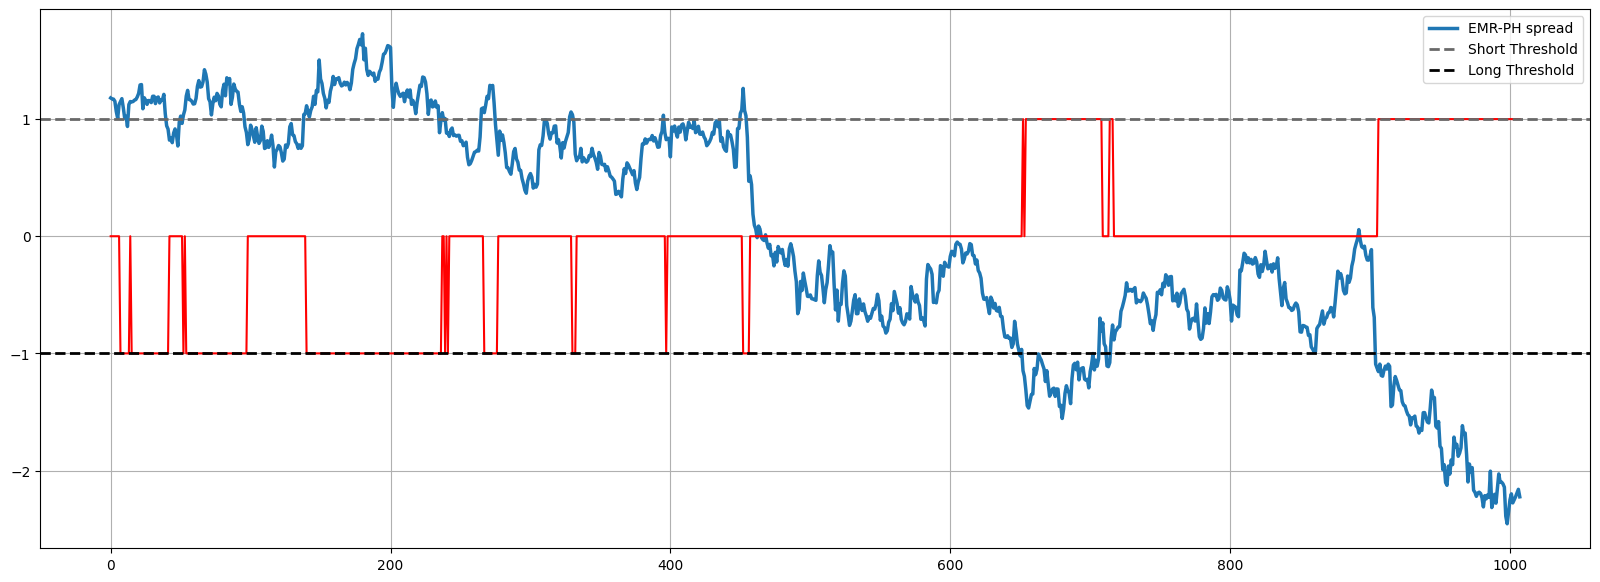

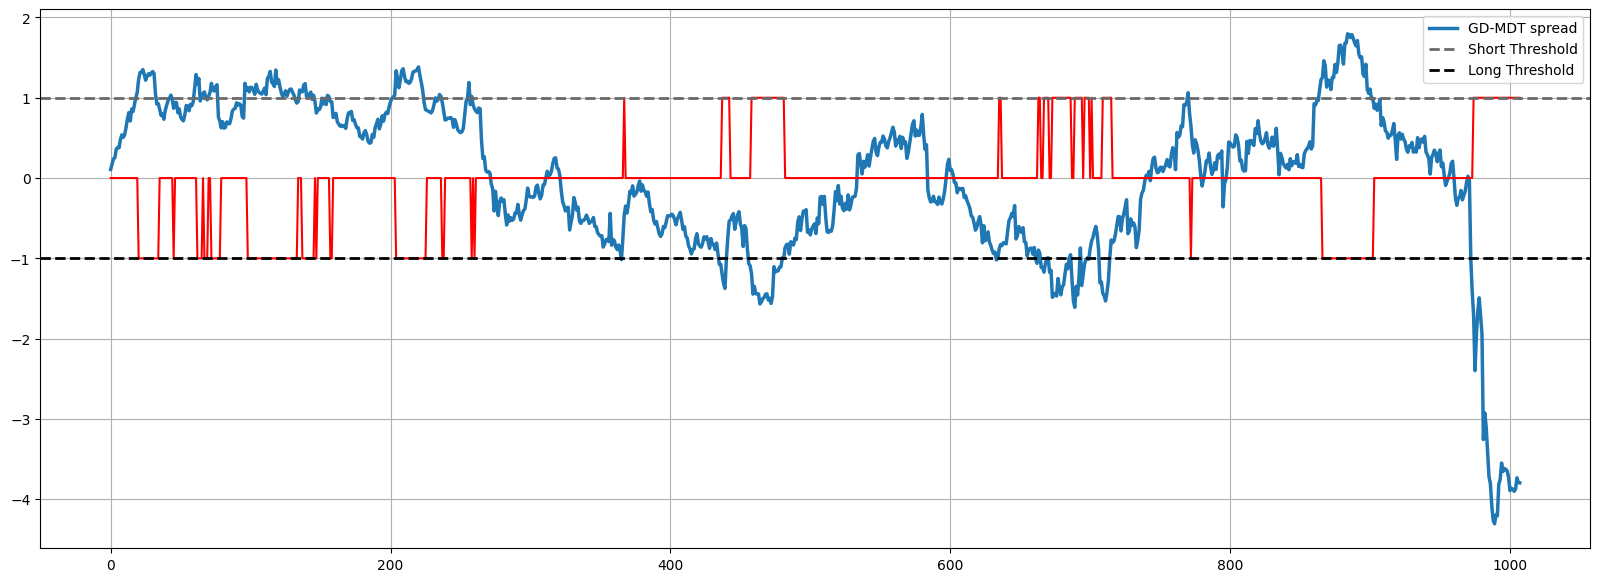

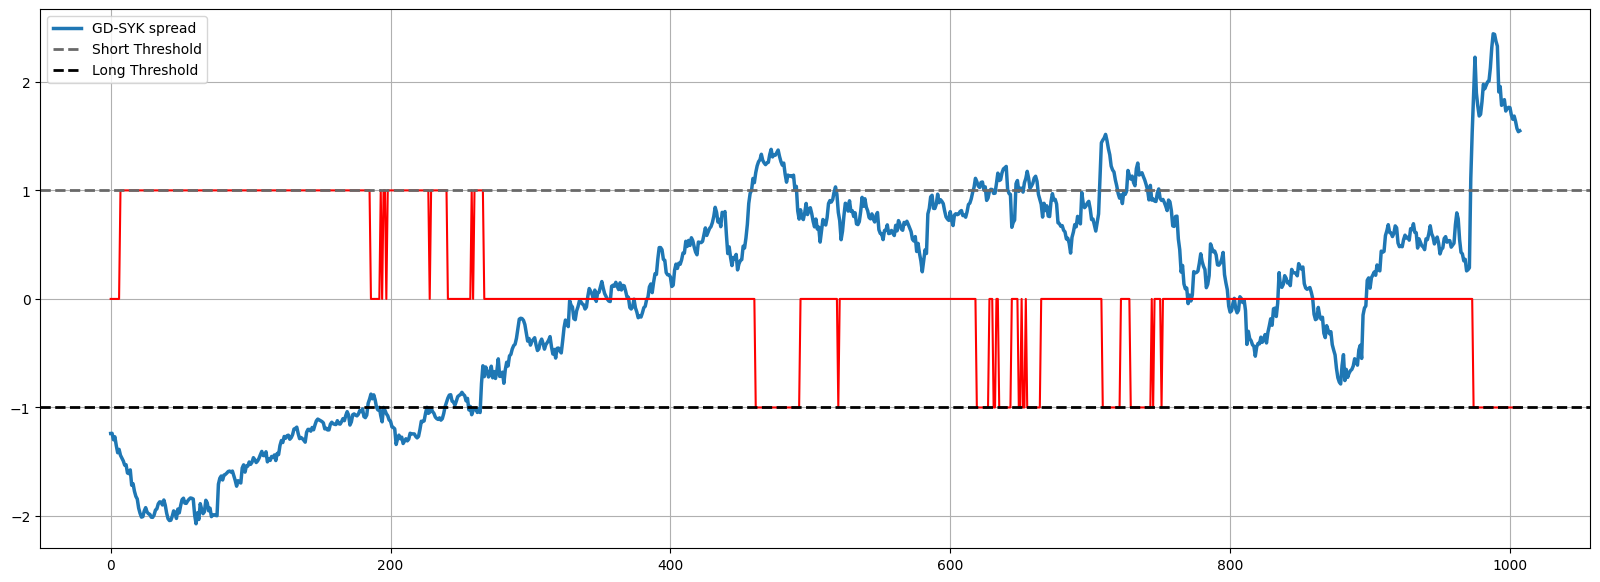

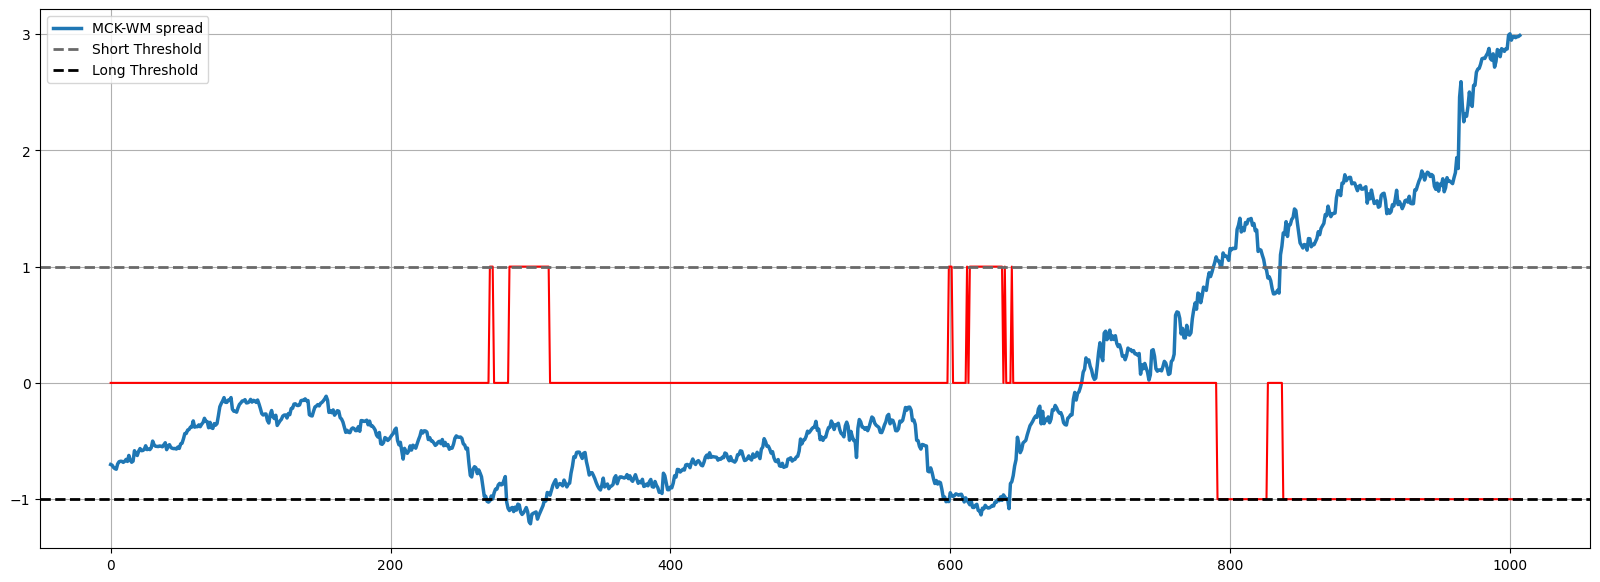

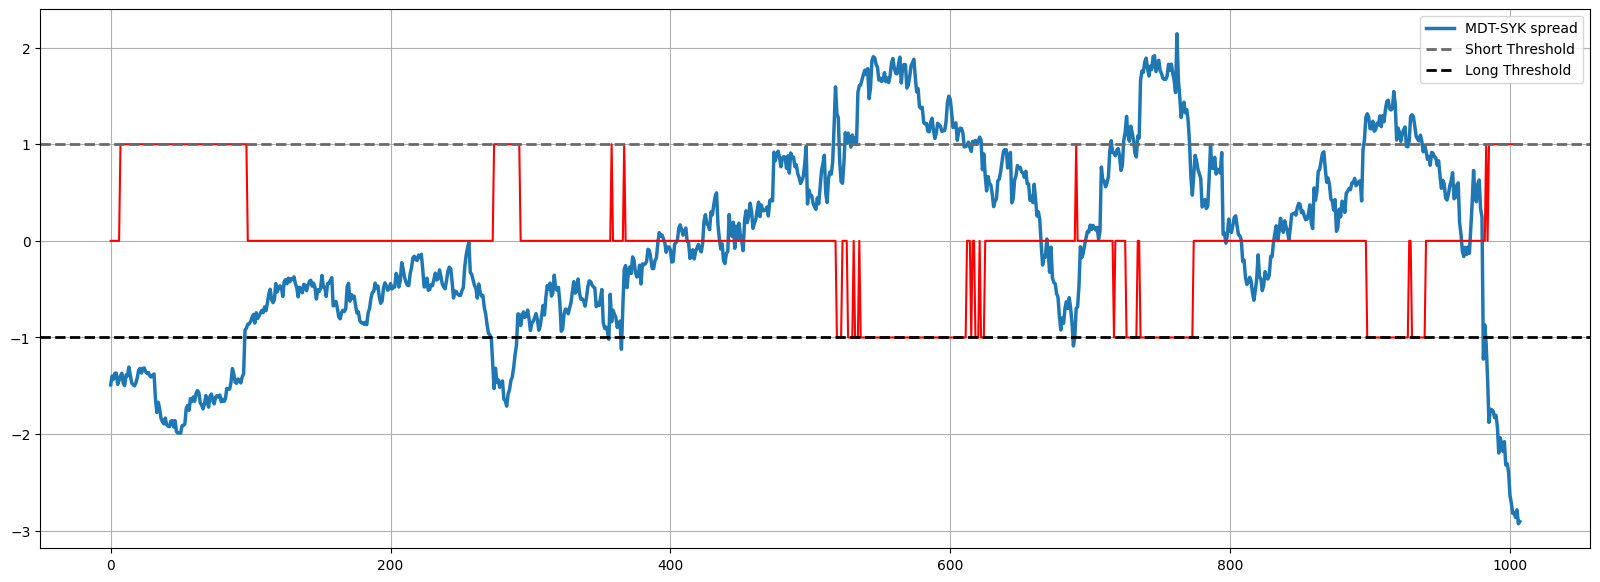

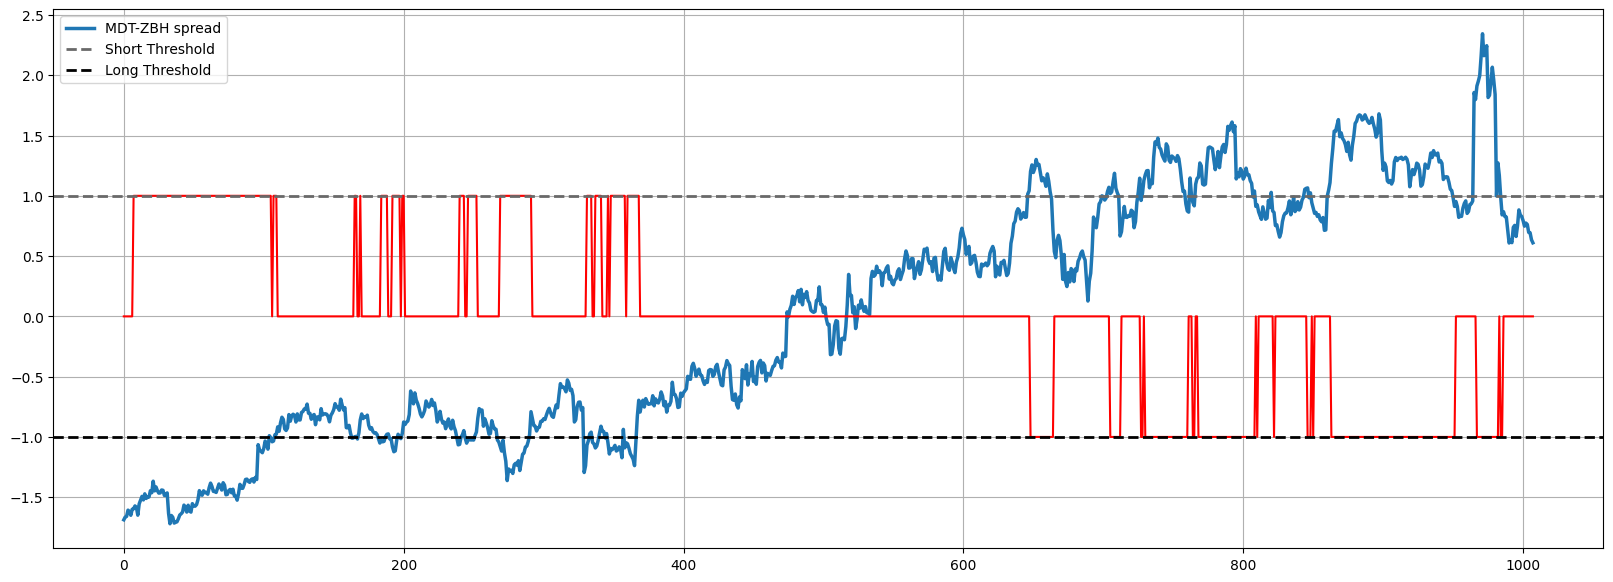

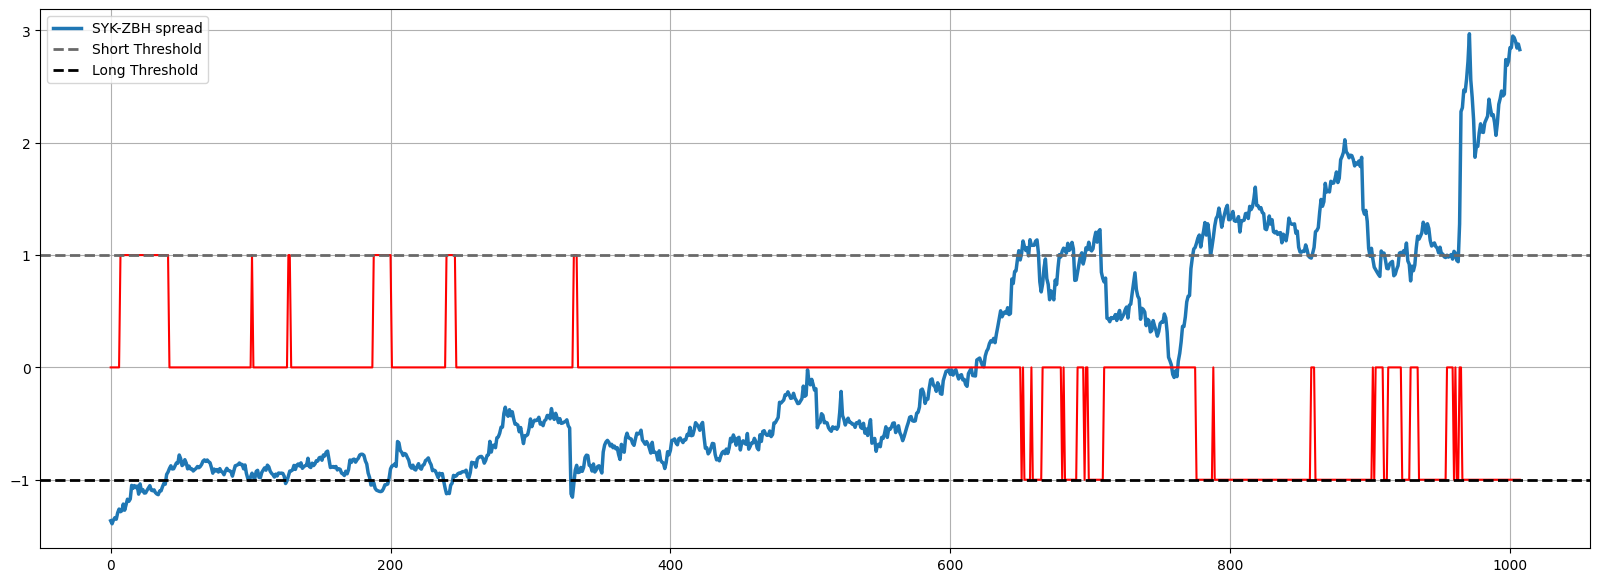

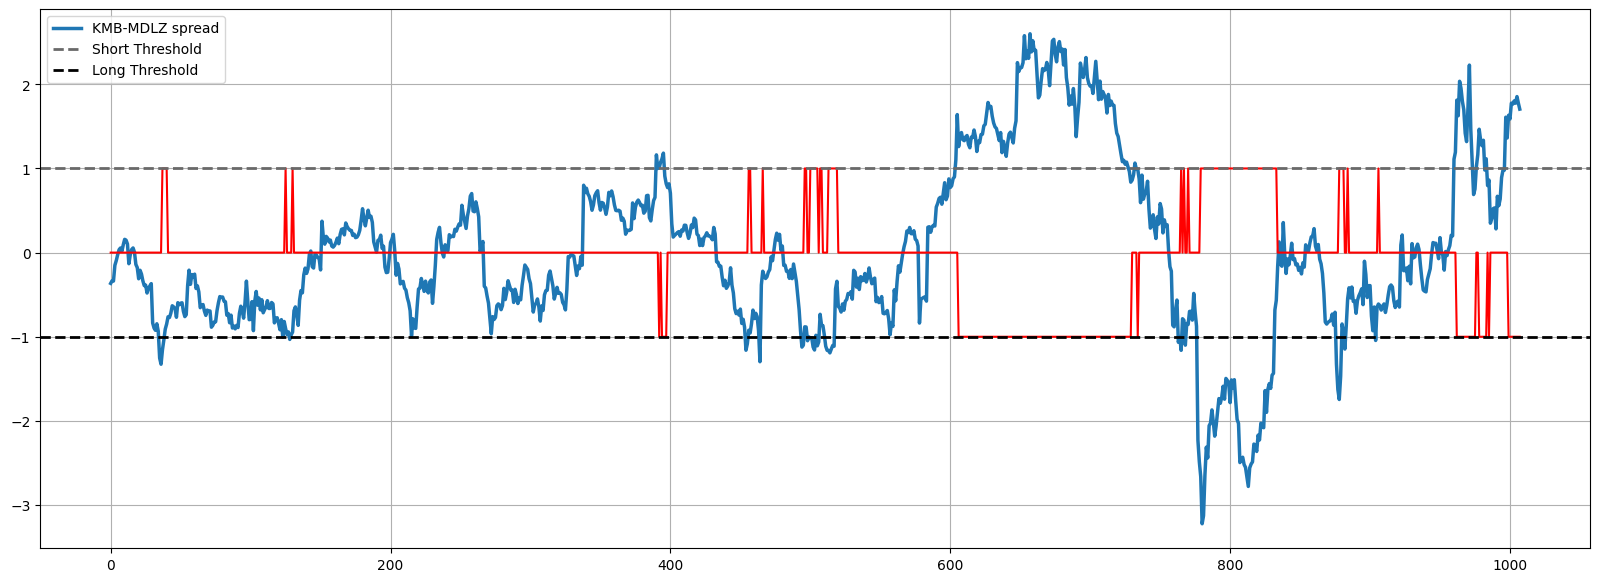

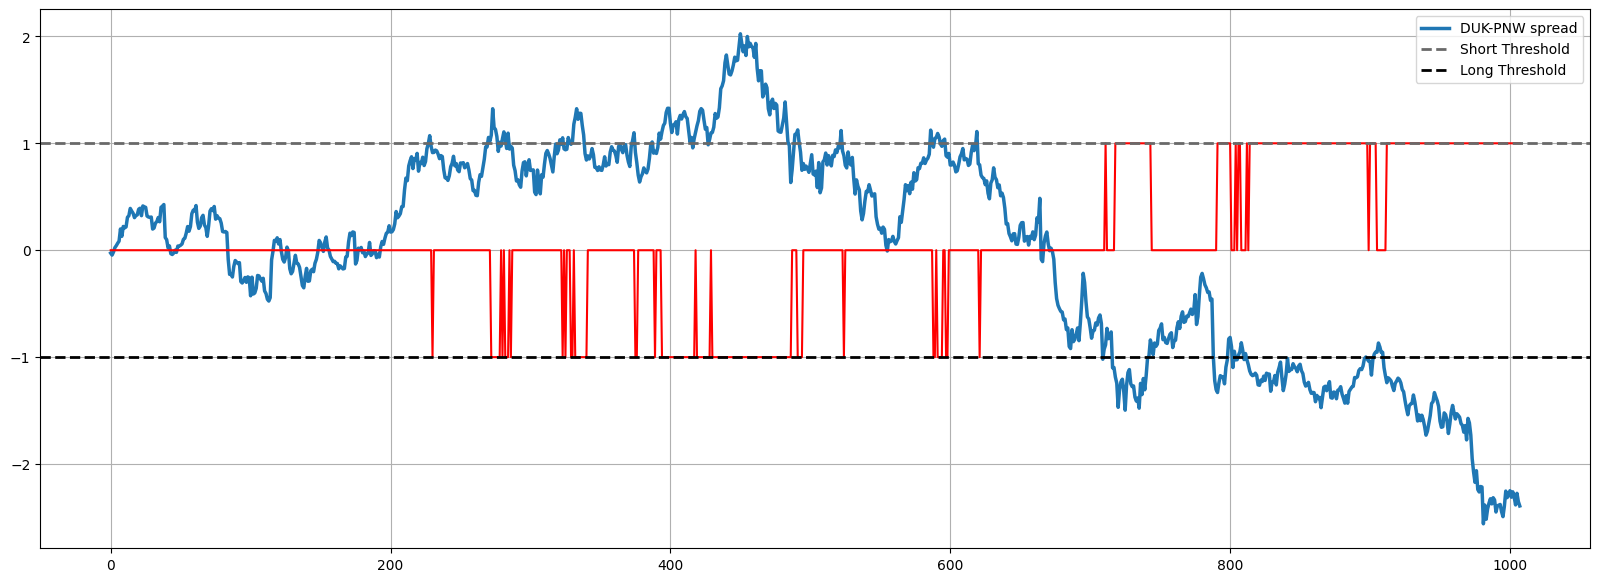

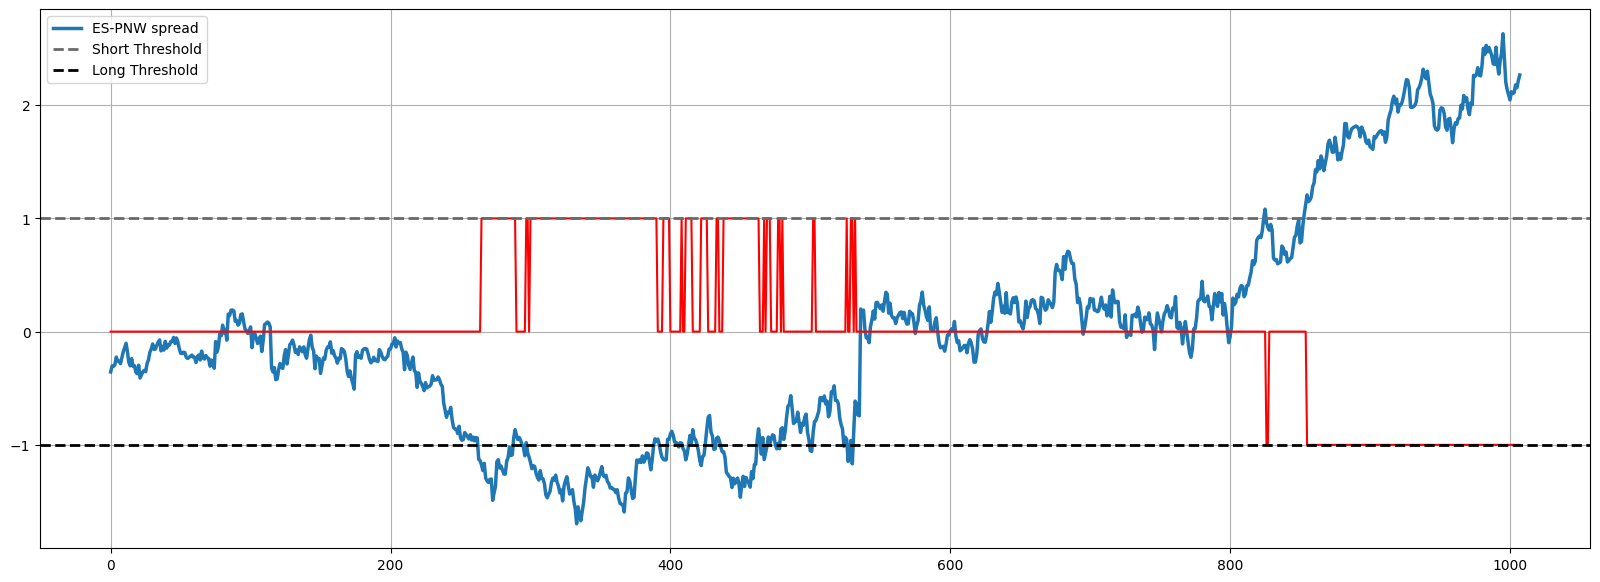

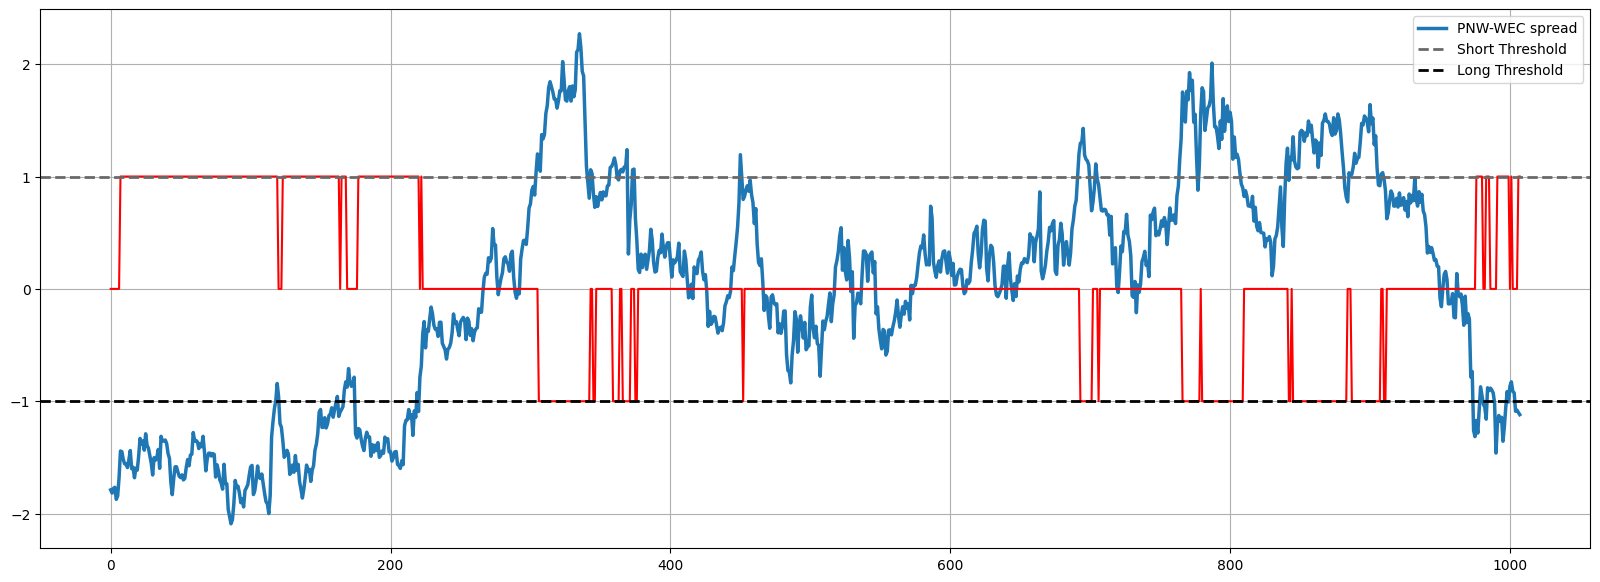

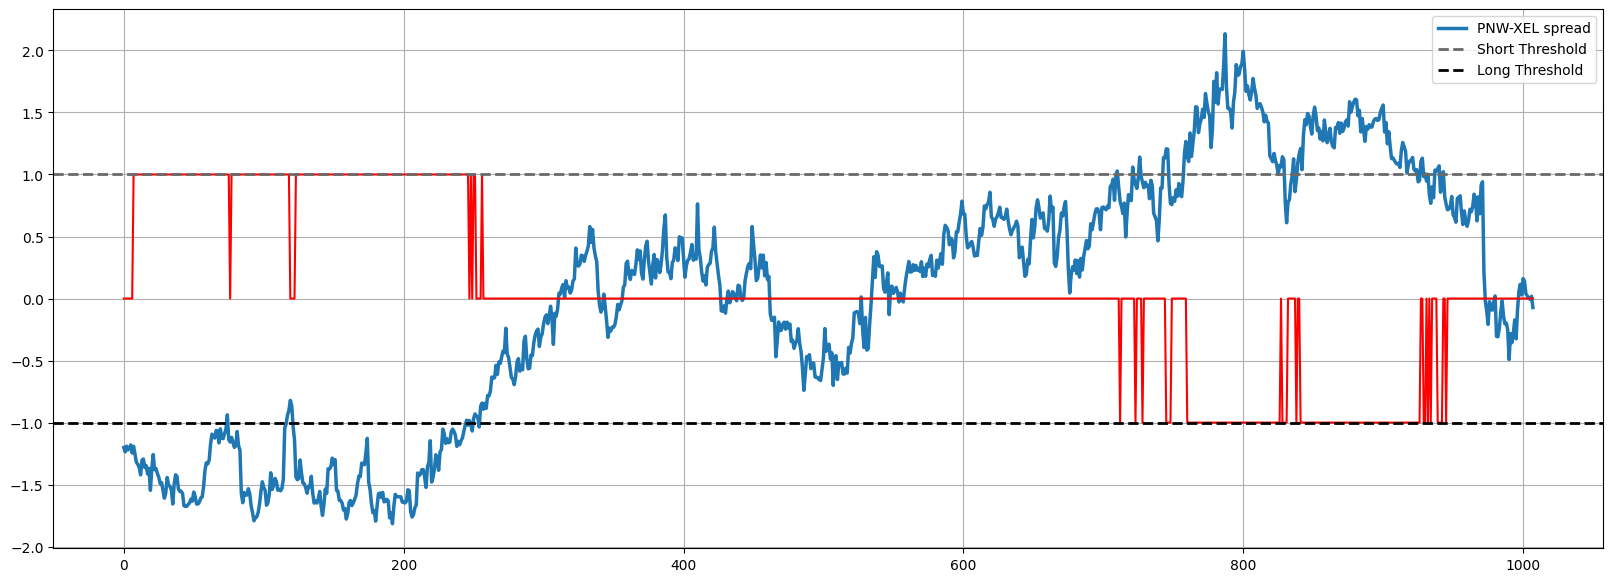

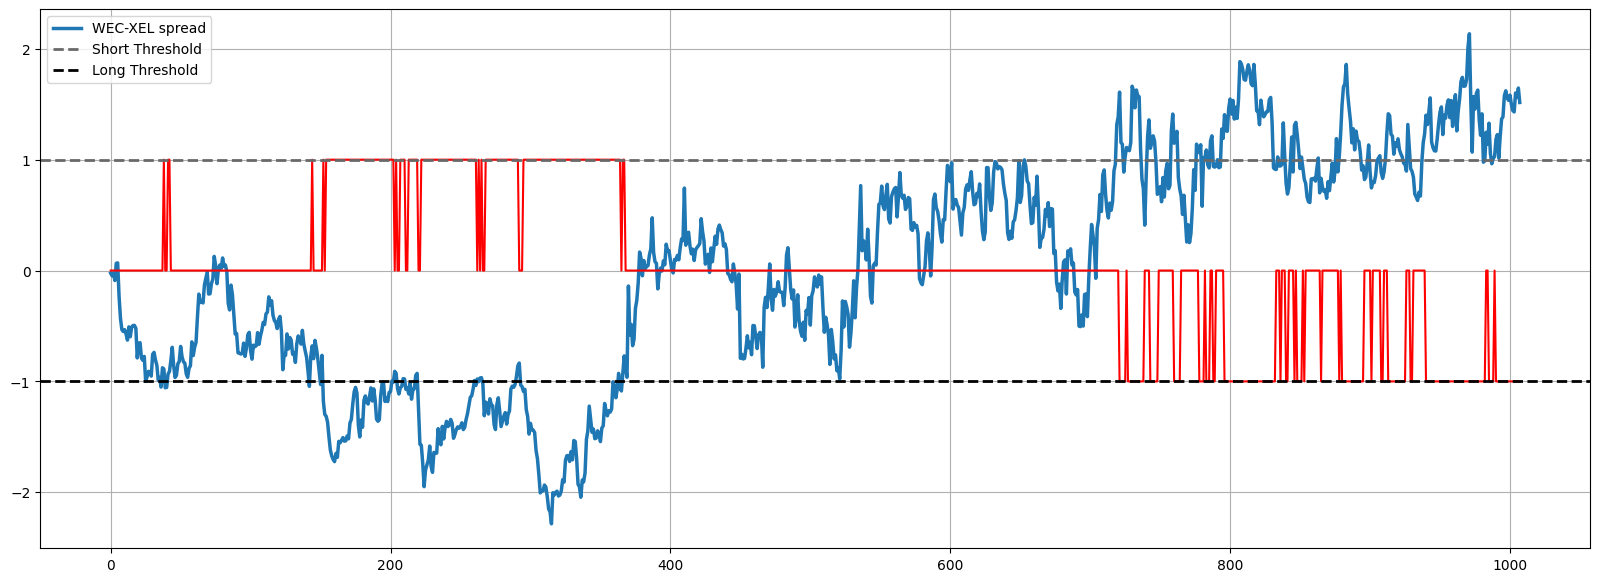

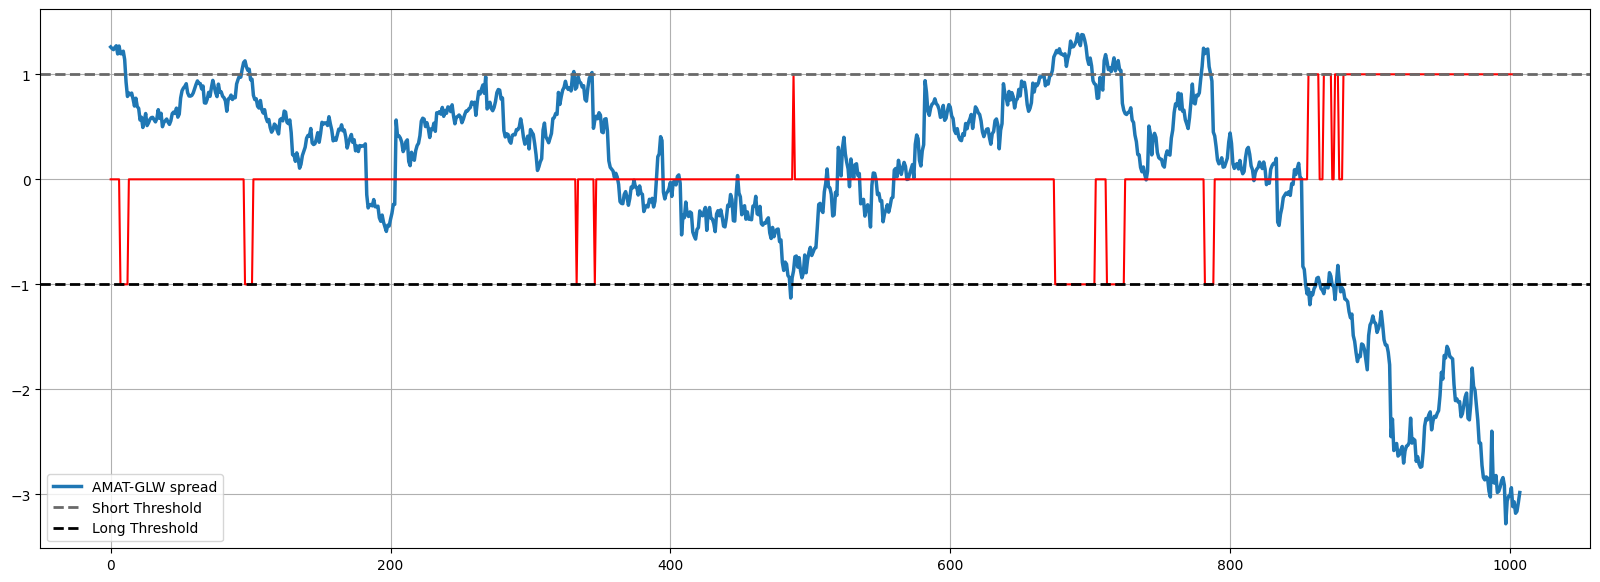

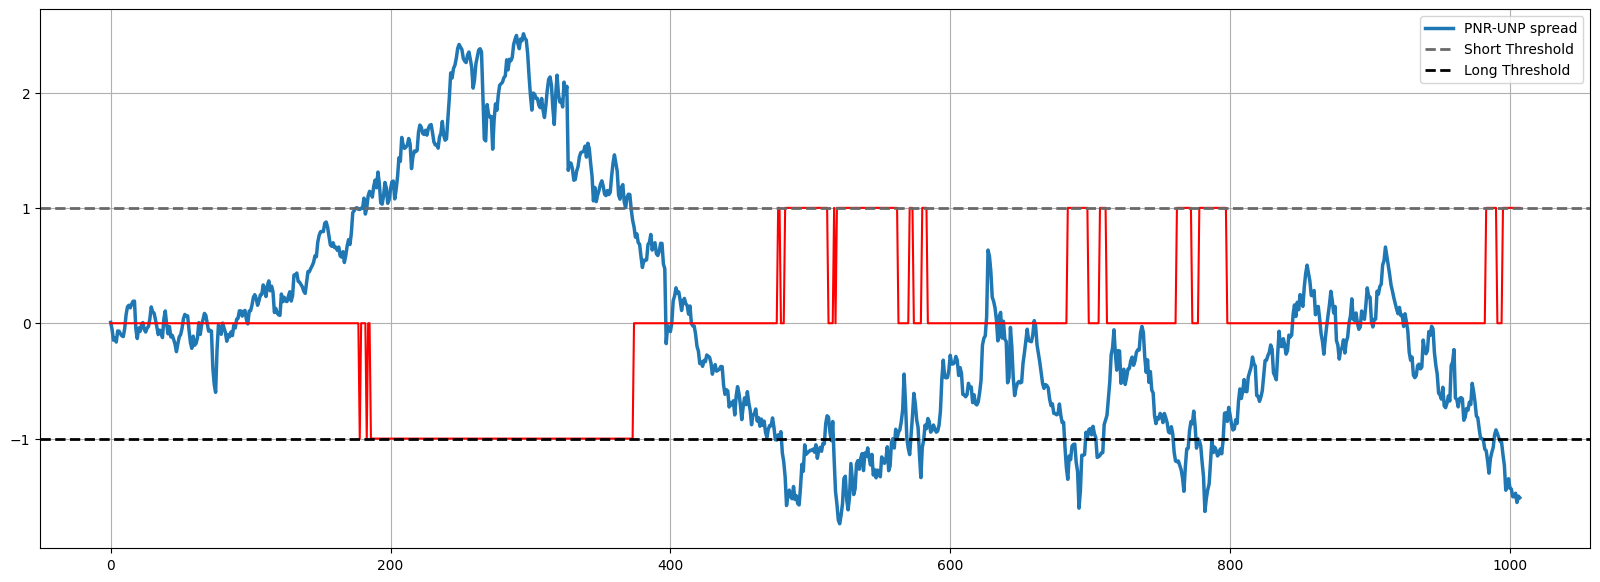

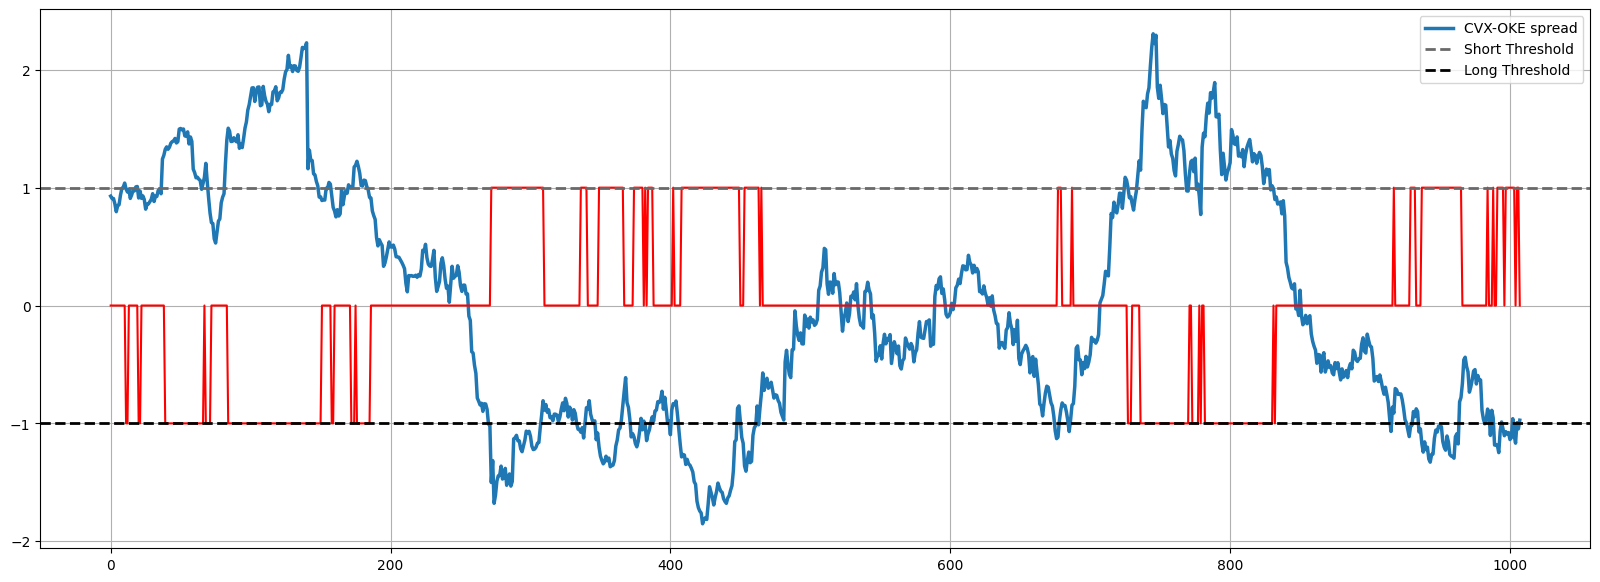

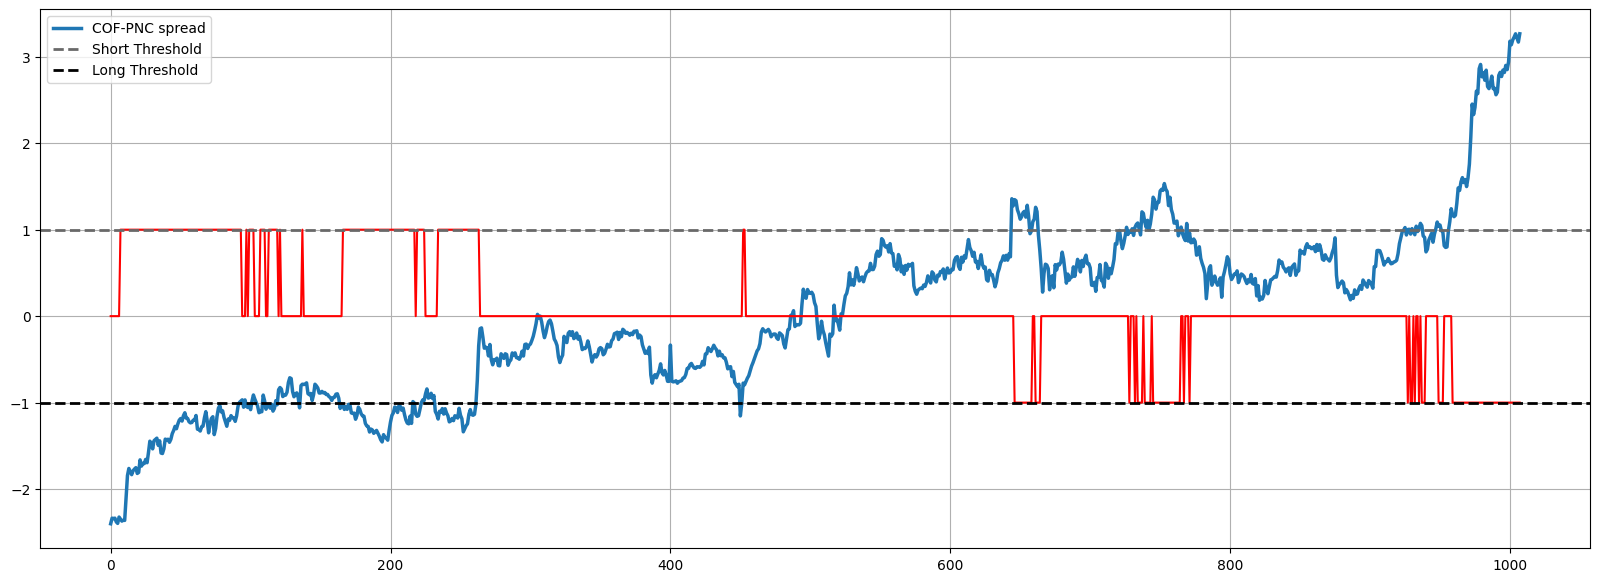

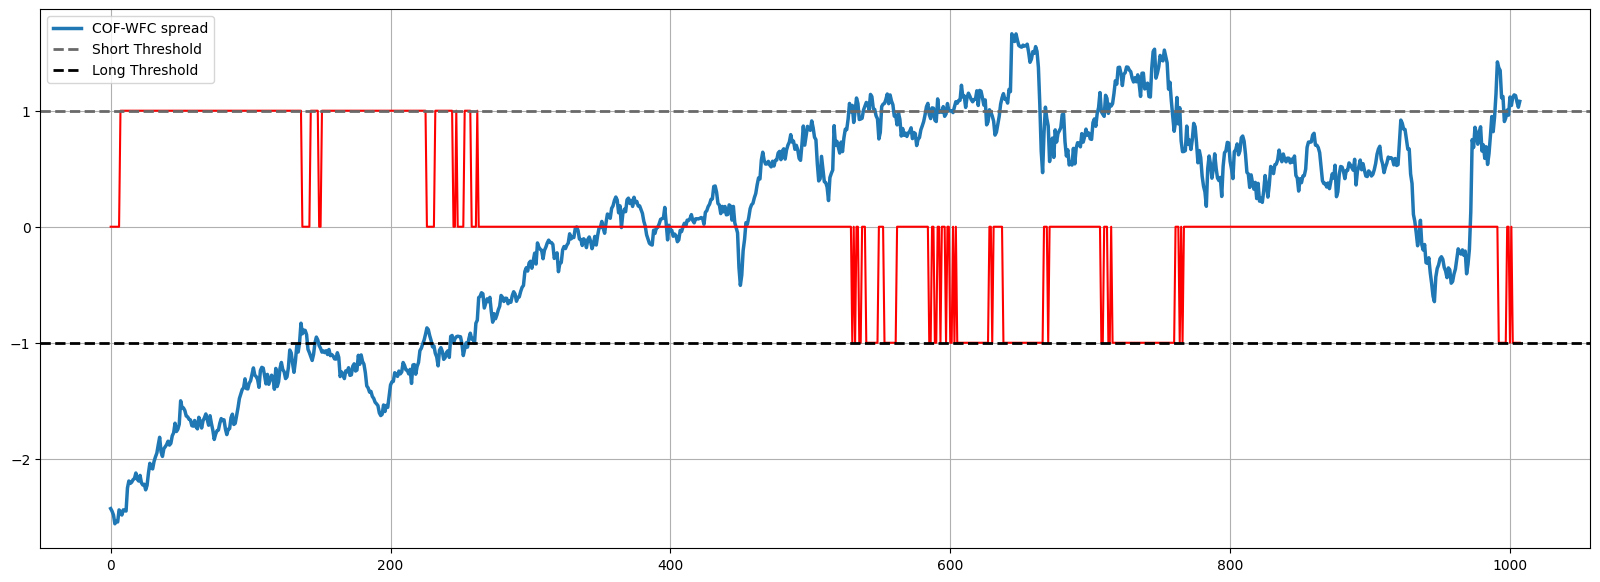

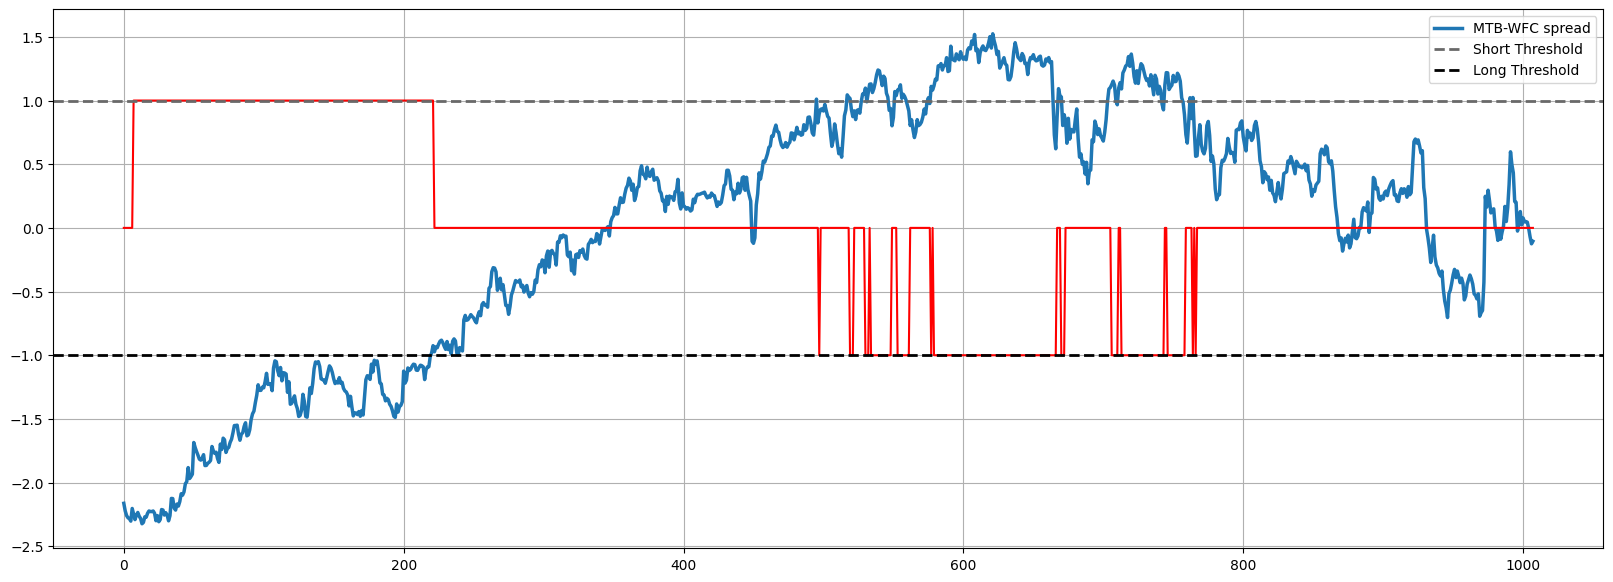

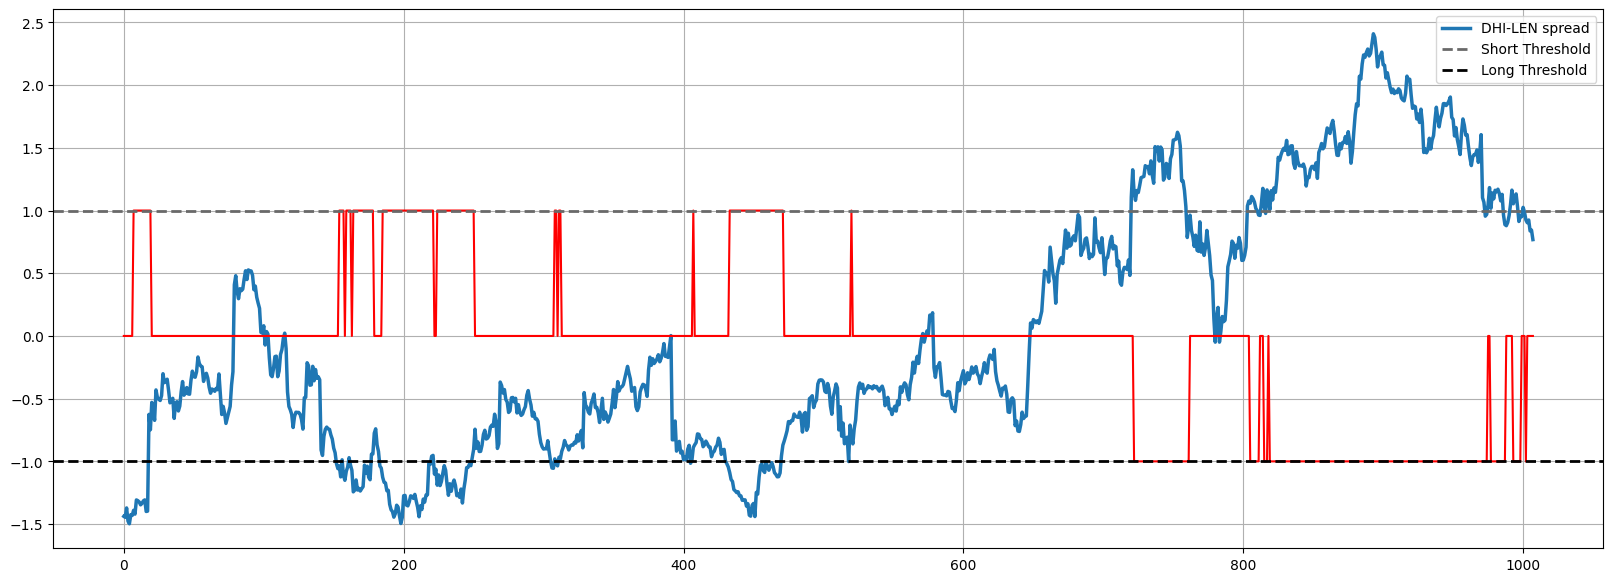

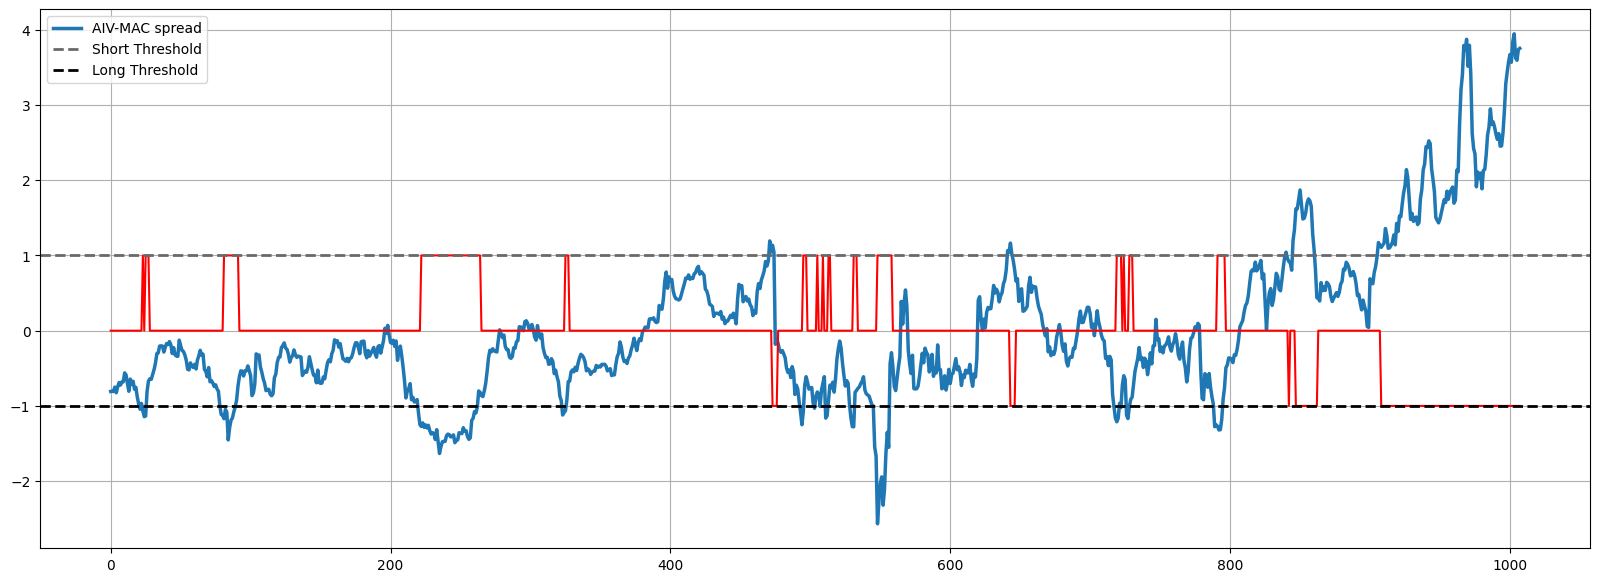

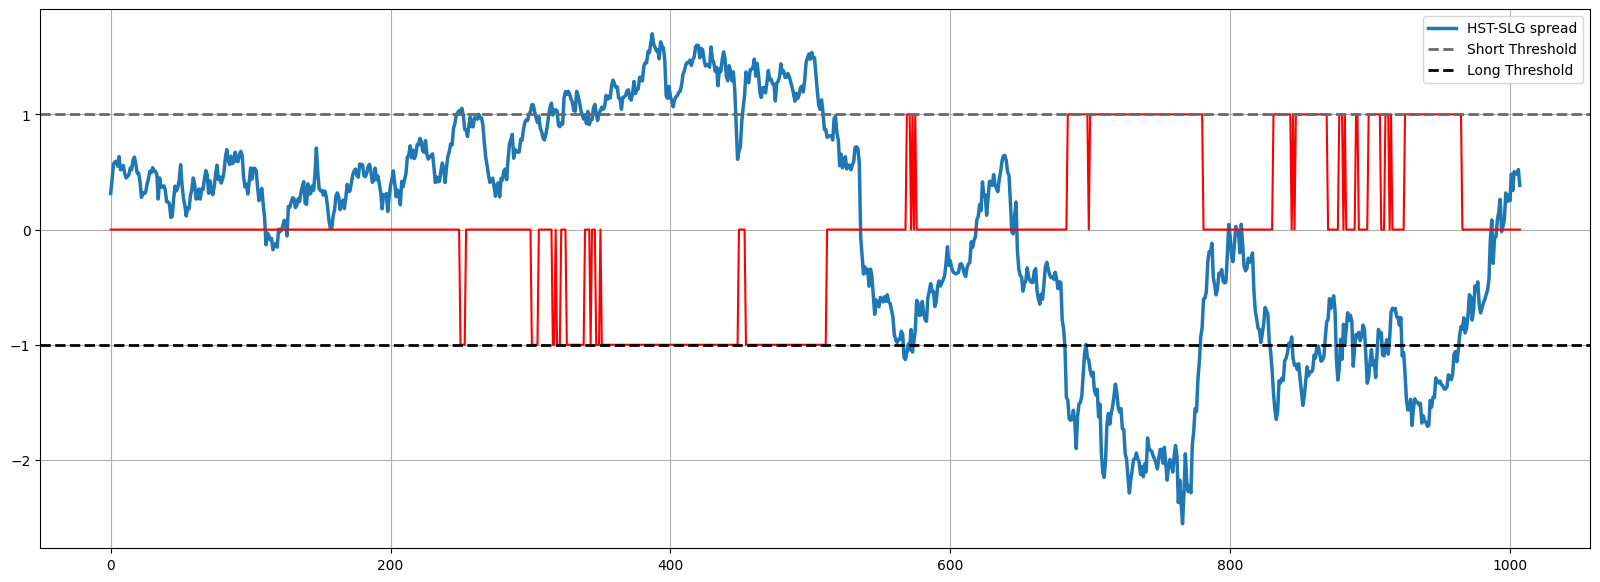

In [15]:
mpl.rcParams['figure.max_open_warning'] = 0
for i in range(len(pairs_OPTICS)):
    plt.figure(figsize=(20,7))
    plt.grid()
    plt.plot(performance_OPTICS_test[i][1]['norm_spread'].values, 
             marker=None, 
             label=performance_OPTICS_test[i][0][0]+'-'+performance_OPTICS_test[i][0][1]+' spread', linewidth=2.5)
    plt.plot(performance_OPTICS_test[i][1]['position_during_day'].values, c='r')
    plt.axhline(y=1, linestyle='--', label='Short Threshold', c='dimgrey',linewidth=2)
    plt.axhline(y=-1, linestyle='--', label='Long Threshold', c='black',linewidth=2)
    plt.legend()